TUGAS ADL (ALGORITMA DEEP LEARNING) 4IA14
- ATTANABIL RABBANI_50421230
- LEONHARD DOMINIKUS ADIARSA FERNANDEZ_50421746

import library

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

load mnist dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


normalize data between 0-1

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

build model

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))),
model.add(tf.keras.layers.Dense(128, activation = "relu")),
model.add(tf.keras.layers.Dense(64, activation = "relu")),
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile model

In [5]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

train model

In [6]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8787 - loss: 0.4133
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9685 - loss: 0.1030
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9781 - loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0504
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 0.0385


evaluate model

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc*100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0927
Test accuracy: 97.61000275611877%


show predictions function

In [13]:
def show_predictions(images, labels, predictions, num=10):
  plt.figure(figsize=(10,15))
  for i in range(num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    predict_label = np.argmax(predictions[i])
    actual_label = labels[i]
    plt.xlabel(f"Pred: {predict_label}\nTrue: {actual_label}")
  plt.show()

show predictions

In [11]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


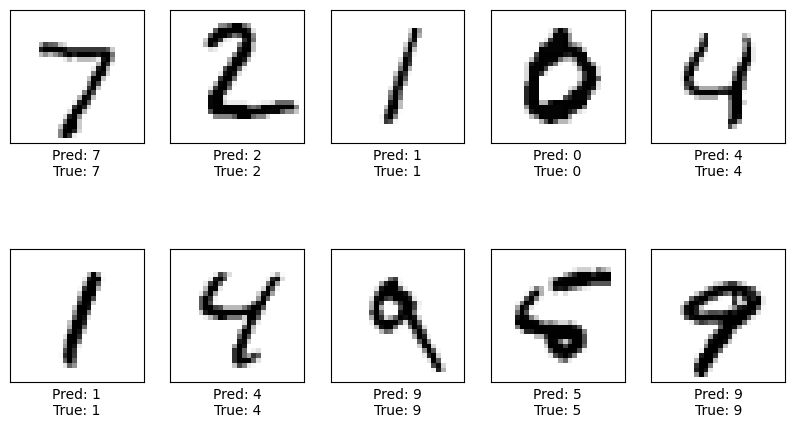

In [14]:
show_predictions(X_test, Y_test, predictions)